#### EDA Dataset

ไฟล์ชุดข้อมูลที่ไม่ได้ถูก Standardize

report.csv.gzข้อมูลรายงาน เช่น วันที่รับรายงาน, วันที่ได้รับ, วันที่อัปเดตล่าสุด
report_serious.csv.gzข้อมูลความรุนแรง เช่น congenital anomaly, life-threatening, disabling, death
reporter.csv.gzข้อมูลผู้รายงาน เช่น บริษัท, คุณสมบัติ, ประเทศ
patient.csv.gzข้อมูลผู้ป่วย เช่น อายุเริ่มป่วย, เพศ, น้ำหนัก
drugcharacteristics.csv.gzลักษณะของยา เช่น ชื่อผลิตภัณฑ์ยา, ลักษณะการใช้, วิธีบริหารยา, ข้อบ่งใช้
drugs.csv.gzข้อมูลยาพร้อม RxCUI แต่ยังไม่ถูก standardize อย่างเต็มรูปแบบ
reactions.csv.gzข้อมูลปฏิกิริยา เช่น MedDRA preferred term และผลลัพธ์ แต่ยังไม่ถูก standardize

ไฟล์ชุดข้อมูลที่ถูก Standardize

standard_drugs.csv.gzข้อมูลยาที่ถูก standardize ด้วย RxNorm concepts
standard_reactions.csv.gzข้อมูลปฏิกิริยาที่ถูก standardize ด้วย MedDRA concepts
standard_drugs_atc.csv.gzข้อมูลยาที่ถูก standardize ด้วย ATC classification
standard_drugs_rxnorm_ingredients.csv.gzข้อมูลยาที่ถูก standardize ด้วย RxNorm ingredients
standard_reactions_meddra_relationships.csv.gzความสัมพันธ์ระหว่าง MedDRA concepts สำหรับปฏิกิริยา
standard_reactions_meddra_hlt.csv.gzปฏิกิริยาที่ map ไปยัง MedDRA High-Level Terms (HLT)
standard_reactions_meddra_hlgt.csv.gzปฏิกิริยาที่ map ไปยัง MedDRA High-Level Group Terms (HLGT)
standard_reactions_meddra_soc.csv.gzปฏิกิริยาที่ map ไปยัง MedDRA System Organ Class (SOC)
standard_reactions_snomed.csv.gzปฏิกิริยาที่ map ไปยัง SNOMED concepts



In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt


#### Load Raw Data

##### Report

In [2]:
report_df = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/report.csv.gz", compression='gzip', low_memory=False)
report_serious_df = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/report_serious.csv.gz", compression='gzip', low_memory=False)
reporter_df = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/reporter.csv.gz", compression='gzip', low_memory=False)

In [3]:
report_df

,safetyreportid,lastupdate_date,mostrecent_receive_date,receive_date
0,10003300,20141002,20140306,20140306
1,10003301,20141002,20140228,20140228
2,10003302,20141002,20140312,20140312
3,10003304,20141212,20140424,20140312
4,10003305,20141002,20140312,20140312
...,...,...,...,...
19026488,9999995,20151125,20150812,20140312
19026489,9999996,20151125,20150812,20140312
19026490,9999997,20151125,20150812,20140312
19026491,9999998,20151125,20150812,20140312


In [25]:
report_df.receive_date = pd.to_datetime(report_df.receive_date,format='%Y%m%d')
report_df['Year'] = report_df.receive_date.apply(lambda x : x.year)

Text(0.5, 0, '')

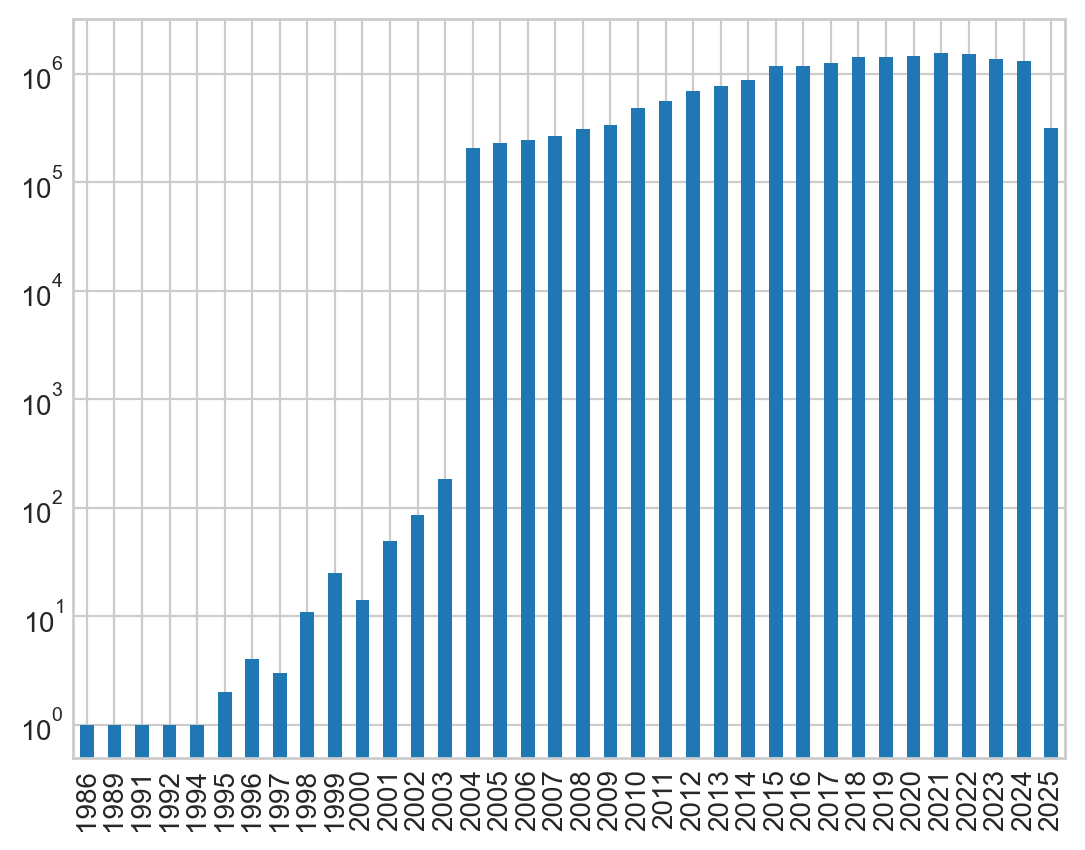

In [27]:
import matplotlib.dates as mdates

nreportoverdates = (report_df.
                    groupby('Year').
                    safetyreportid.
                    count()
                   )
nreportoverdates.head()
fig,ax = plt.subplots(dpi=200)
nreportoverdates.plot(kind='bar',ax=ax)
ax.set_yscale('log')
ax.set_xlabel('')

In [4]:
report_serious_df

,congenital_anomali,death,disabling,life_threatening,other,safetyreportid,serious
0,NaN,NaN,1.0,NaN,NaN,10003300,"The adverse event resulted in death, a life th..."
1,NaN,NaN,NaN,NaN,1.0,10003301,"The adverse event resulted in death, a life th..."
2,NaN,NaN,NaN,NaN,NaN,10003302,The adverse event did not result in any of the...
3,NaN,NaN,NaN,NaN,NaN,10003304,The adverse event did not result in any of the...
4,NaN,NaN,NaN,NaN,NaN,10003305,The adverse event did not result in any of the...
...,...,...,...,...,...,...,...
19026488,NaN,NaN,NaN,NaN,NaN,9999995,The adverse event did not result in any of the...
19026489,NaN,NaN,NaN,NaN,NaN,9999996,The adverse event did not result in any of the...
19026490,NaN,NaN,NaN,NaN,NaN,9999997,The adverse event did not result in any of the...
19026491,NaN,NaN,NaN,NaN,NaN,9999998,The adverse event did not result in any of the...


In [5]:
reporter_df

,reporter_company,reporter_country,reporter_qualification,safetyreportid
0,1289378,US,Consumer or non-health professional,10003300
1,US-JNJFOC-20130719067,US,Consumer or non-health professional,10003301
2,US-PFIZER INC-2014068976,US,Consumer or non-health professional,10003302
3,US-PFIZER INC-2014063856,US,Physician,10003304
4,US-PFIZER INC-2014069067,US,Physician,10003305
...,...,...,...,...
19026488,US-GILEAD-2012-0057367,US,Other health professional,9999995
19026489,US-GILEAD-2012-0057033,US,Consumer or non-health professional,9999996
19026490,US-GILEAD-2012-0058165,US,Consumer or non-health professional,9999997
19026491,US-GILEAD-2012-0058899,US,Physician,9999998


In [6]:
report_merge = report_df.merge(report_serious_df, on='safetyreportid', how='left')
report_merge = report_merge.merge(reporter_df, on='safetyreportid', how='left')
report_merge.head()

,safetyreportid,lastupdate_date,mostrecent_receive_date,receive_date,congenital_anomali,death,disabling,life_threatening,other,serious,reporter_company,reporter_country,reporter_qualification
0,10003300,20141002,20140306,20140306,NaN,NaN,1.0,NaN,NaN,"The adverse event resulted in death, a life th...",1289378,US,Consumer or non-health professional
1,10003301,20141002,20140228,20140228,NaN,NaN,NaN,NaN,1.0,"The adverse event resulted in death, a life th...",US-JNJFOC-20130719067,US,Consumer or non-health professional
2,10003302,20141002,20140312,20140312,NaN,NaN,NaN,NaN,NaN,The adverse event did not result in any of the...,US-PFIZER INC-2014068976,US,Consumer or non-health professional
3,10003304,20141212,20140424,20140312,NaN,NaN,NaN,NaN,NaN,The adverse event did not result in any of the...,US-PFIZER INC-2014063856,US,Physician
4,10003305,20141002,20140312,20140312,NaN,NaN,NaN,NaN,NaN,The adverse event did not result in any of the...,US-PFIZER INC-2014069067,US,Physician


In [7]:
report_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19026493 entries, 0 to 19026492
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   safetyreportid           object 
 1   lastupdate_date          int64  
 2   mostrecent_receive_date  int64  
 3   receive_date             int64  
 4   congenital_anomali       float64
 5   death                    float64
 6   disabling                float64
 7   life_threatening         float64
 8   other                    float64
 9   serious                  object 
 10  reporter_company         object 
 11  reporter_country         object 
 12  reporter_qualification   object 
dtypes: float64(5), int64(3), object(5)
memory usage: 1.8+ GB


In [8]:
report_merge.isna().sum().sort_values(ascending=False)

congenital_anomali         14130322
disabling                  13901050
life_threatening           13774745
death                      12814817
other                       9136830
reporter_company            1272650
reporter_qualification       735234
reporter_country             373496
safetyreportid                    0
receive_date                      0
mostrecent_receive_date           0
lastupdate_date                   0
serious                           0
dtype: int64

In [9]:
outcome_cols = ['congenital_anomali', 'disabling', 'life_threatening', 'death', 'other']

for i in outcome_cols:
    print(report_merge[i].unique())

existing_outcome_cols = [col for col in outcome_cols if col in report_merge.columns]

for col in existing_outcome_cols:
    report_merge[col] = report_merge[col].fillna(0).astype(int)
    
# After filling na
print('')
print('After filling NA : \n')
for i in outcome_cols:
    print(report_merge[i].unique())


[nan  1.  2.]
[ 1. nan  2.]
[nan  1.  2.]


[nan  1.  2.]
[nan  1.  2.]

After filling NA : 

[0 1 2]
[1 0 2]
[0 1 2]
[0 1 2]
[0 1 2]


In [10]:
report_merge.isna().sum().sort_values(ascending=False)

reporter_company           1272650
reporter_qualification      735234
reporter_country            373496
lastupdate_date                  0
safetyreportid                   0
congenital_anomali               0
receive_date                     0
mostrecent_receive_date          0
death                            0
other                            0
life_threatening                 0
disabling                        0
serious                          0
dtype: int64


ข้อมูลที่เตรียมสำหรับ plot (จำนวนของ 0, 1, 2 ในแต่ละคอลัมน์):
                    Count of 0  Count of 1  Count of 2
congenital_anomali    14130322       63120     4833051
disabling             13901050      359735     4765708
life_threatening      13774745      521969     4729779
death                 12814817     1762105     4449571
other                  9136830     7057337     2832326


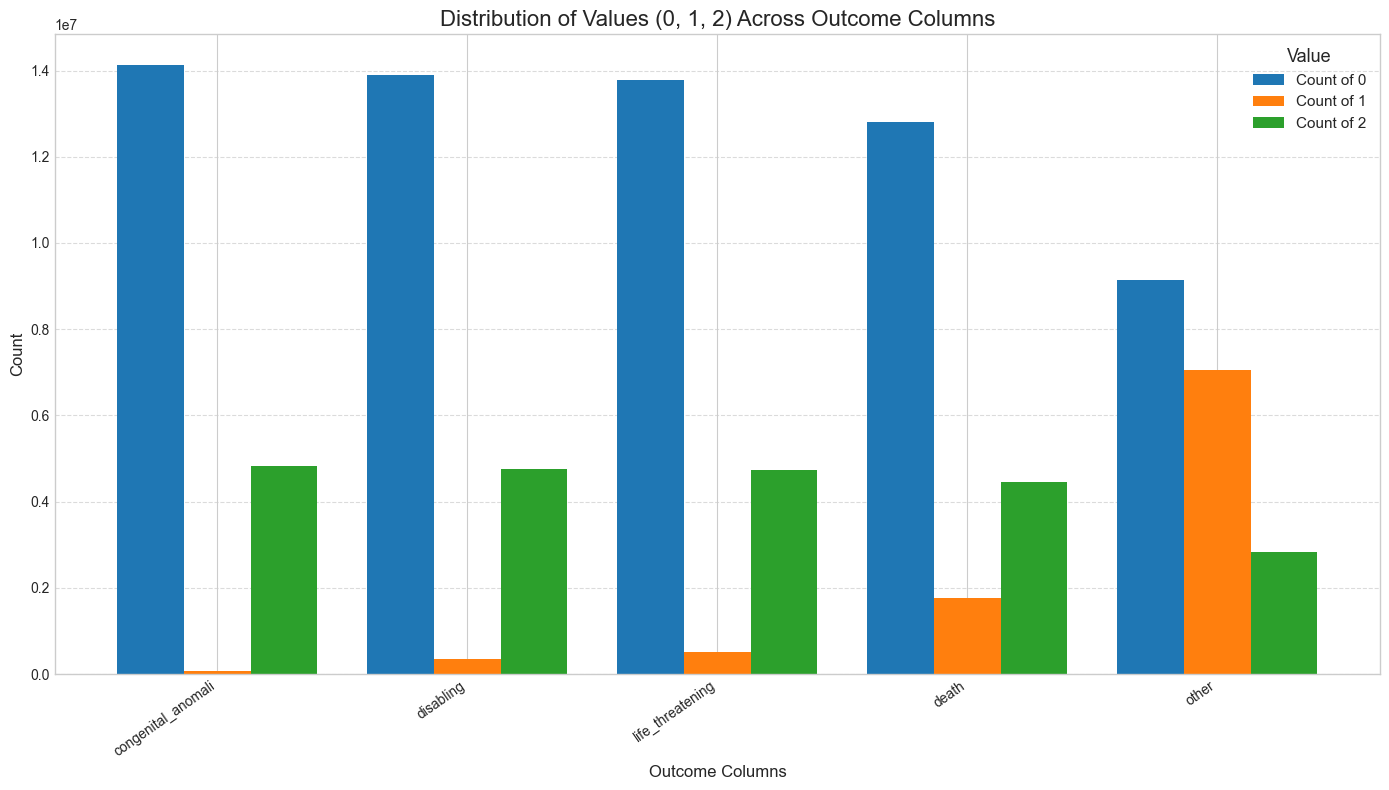

In [11]:
outcome_cols = ['congenital_anomali', 'disabling', 'life_threatening', 'death', 'other']
counts_data = {}

for i in outcome_cols:
    counts = report_merge[i].value_counts().reindex([0, 1, 2], fill_value=0).sort_index()
    counts_data[i] = counts

plot_df = pd.DataFrame(counts_data)
plot_df_transposed = plot_df.transpose()
plot_df_transposed.columns = ['Count of 0', 'Count of 1', 'Count of 2']

print("\nข้อมูลที่เตรียมสำหรับ plot (จำนวนของ 0, 1, 2 ในแต่ละคอลัมน์):")
print(plot_df_transposed)

plt.style.use('seaborn-v0_8-whitegrid')
ax = plot_df_transposed.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Distribution of Values (0, 1, 2) Across Outcome Columns', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Outcome Columns', fontsize=12)
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Value', title_fontsize='13', fontsize='11', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [12]:
report_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19026493 entries, 0 to 19026492
Data columns (total 13 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   safetyreportid           object
 1   lastupdate_date          int64 
 2   mostrecent_receive_date  int64 
 3   receive_date             int64 
 4   congenital_anomali       int64 
 5   death                    int64 
 6   disabling                int64 
 7   life_threatening         int64 
 8   other                    int64 
 9   serious                  object
 10  reporter_company         object
 11  reporter_country         object
 12  reporter_qualification   object
dtypes: int64(8), object(5)
memory usage: 1.8+ GB


In [13]:
print(report_merge[['lastupdate_date', 'mostrecent_receive_date', 'receive_date']].head())
date_cols_to_convert = ['lastupdate_date', 'mostrecent_receive_date', 'receive_date']

for col in date_cols_to_convert:
    report_merge[col] = pd.to_datetime(report_merge[col].astype(str), format='%Y%m%d', errors='coerce')

   lastupdate_date  mostrecent_receive_date  receive_date
0         20141002                 20140306      20140306
1         20141002                 20140228      20140228
2         20141002                 20140312      20140312
3         20141212                 20140424      20140312
4         20141002                 20140312      20140312


In [14]:
print(report_merge[['lastupdate_date', 'mostrecent_receive_date', 'receive_date']].head())
print(report_merge.info())

  lastupdate_date mostrecent_receive_date receive_date
0      2014-10-02              2014-03-06   2014-03-06
1      2014-10-02              2014-02-28   2014-02-28
2      2014-10-02              2014-03-12   2014-03-12
3      2014-12-12              2014-04-24   2014-03-12
4      2014-10-02              2014-03-12   2014-03-12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19026493 entries, 0 to 19026492
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   safetyreportid           object        
 1   lastupdate_date          datetime64[ns]
 2   mostrecent_receive_date  datetime64[ns]
 3   receive_date             datetime64[ns]
 4   congenital_anomali       int64         
 5   death                    int64         
 6   disabling                int64         
 7   life_threatening         int64         
 8   other                    int64         
 9   serious                  object        
 10  reporter_c

In [15]:
report_merge.isna().sum().sort_values(ascending=False)

reporter_company           1272650
reporter_qualification      735234
reporter_country            373496
mostrecent_receive_date         44
safetyreportid                   0
congenital_anomali               0
receive_date                     0
lastupdate_date                  0
death                            0
other                            0
life_threatening                 0
disabling                        0
serious                          0
dtype: int64

In [18]:
categorical_cols_to_fill_unknown = ['reporter_company', 'reporter_qualification', 'reporter_country']
for col in categorical_cols_to_fill_unknown:
    report_merge[col] = report_merge[col].fillna('Unknown')

In [ ]:
rows_with_nat_mostrecent_date = report_merge['mostrecent_receive_date'].isnull().sum()
print(f"\nจำนวนแถวที่จะถูกลบเนื่องจาก mostrecent_receive_date เป็น NaN: {rows_with_nat_mostrecent_date}")
report_merge = report_merge.dropna(subset=['mostrecent_receive_date'])

print("\n--- จำนวนข้อมูลที่หายไป (หลังลบแถวที่ mostrecent_receive_date เป็น NaN) ---")
print(report_merge.isnull().sum())
print(f"จำนวนแถวทั้งหมดหลังการดำเนินการ: {len(report_merge)}")



จำนวนแถวที่จะถูกลบเนื่องจาก mostrecent_receive_date เป็น NaN: 44

--- จำนวนข้อมูลที่หายไป (หลังลบแถวที่ mostrecent_receive_date เป็น NaT) ---
safetyreportid             0
lastupdate_date            0
mostrecent_receive_date    0
receive_date               0
congenital_anomali         0
death                      0
disabling                  0
life_threatening           0
other                      0
serious                    0
reporter_company           0
reporter_country           0
reporter_qualification     0
dtype: int64
จำนวนแถวทั้งหมดหลังการดำเนินการ: 19026449


In [23]:
print("\n--- ตัวอย่างข้อมูล 5 แถวแรกหลังการจัดการ ---")
report_merge.info()


--- ตัวอย่างข้อมูล 5 แถวแรกหลังการจัดการ ---
<class 'pandas.core.frame.DataFrame'>
Index: 19026449 entries, 0 to 19026492
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   safetyreportid           object        
 1   lastupdate_date          datetime64[ns]
 2   mostrecent_receive_date  datetime64[ns]
 3   receive_date             datetime64[ns]
 4   congenital_anomali       int64         
 5   death                    int64         
 6   disabling                int64         
 7   life_threatening         int64         
 8   other                    int64         
 9   serious                  object        
 10  reporter_company         object        
 11  reporter_country         object        
 12  reporter_qualification   object        
dtypes: datetime64[ns](3), int64(5), object(5)
memory usage: 2.0+ GB


##### Patien

In [31]:
patient_df = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/patient.csv.gz", compression='gzip', low_memory=False)

In [60]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19026493 entries, 0 to 19026492
Data columns (total 6 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   patient_custom_master_age  float64
 1   patient_onsetage           float64
 2   patient_onsetageunit       object 
 3   patient_sex                object 
 4   patient_weight             float64
 5   safetyreportid             object 
dtypes: float64(3), object(3)
memory usage: 871.0+ MB


In [61]:
patient_df.isna().sum().sort_values(ascending=False)

patient_weight               15195269
patient_custom_master_age     8339615
patient_onsetageunit          8339172
patient_onsetage              8326269
patient_sex                   2209484
safetyreportid                      0
dtype: int64

In [69]:
patient_df= patient_df.dropna(subset=['patient_custom_master_age'])
patient_df= patient_df.dropna(subset=['patient_sex'])
patient_df= patient_df.dropna(subset=['patient_weight'])

In [70]:
patient_df.isna().sum().sort_values(ascending=False)

patient_custom_master_age    0
patient_onsetage             0
patient_onsetageunit         0
patient_sex                  0
patient_weight               0
safetyreportid               0
dtype: int64

In [72]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2947791 entries, 11 to 19026479
Data columns (total 6 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   patient_custom_master_age  float64
 1   patient_onsetage           float64
 2   patient_onsetageunit       object 
 3   patient_sex                object 
 4   patient_weight             float64
 5   safetyreportid             object 
dtypes: float64(3), object(3)
memory usage: 157.4+ MB


In [100]:
patient_df.head()

,patient_custom_master_age,patient_onsetage,patient_onsetageunit,patient_sex,patient_weight,safetyreportid
11,43.0,43.0,Year,Female,41.8,10003312
16,46.0,46.0,Year,Male,65.5,10003317
17,59.0,59.0,Year,Female,57.8,10003318
22,73.0,73.0,Year,Female,57.0,10003323
28,79.0,79.0,Year,Female,61.0,10003329


In [107]:
ped_age = patient_df[(patient_df['patient_custom_master_age'] >= 0) & (patient_df['patient_custom_master_age'] <= 21)]
ped_age.shape


(257249, 6)

In [103]:
# patient_df['patient_sex'].value_counts().plot.bar()
# plt(x='patient_sex',y='patient_custom_master_age',data=patient_df, xlabel='Patient Sex', ylabel='Patient Age')


In [73]:
ped_reports = (patient_df.
               query('patient_custom_master_age>0 & patient_custom_master_age<21').
               safetyreportid.unique()
              )

Text(0.5, 0, '')

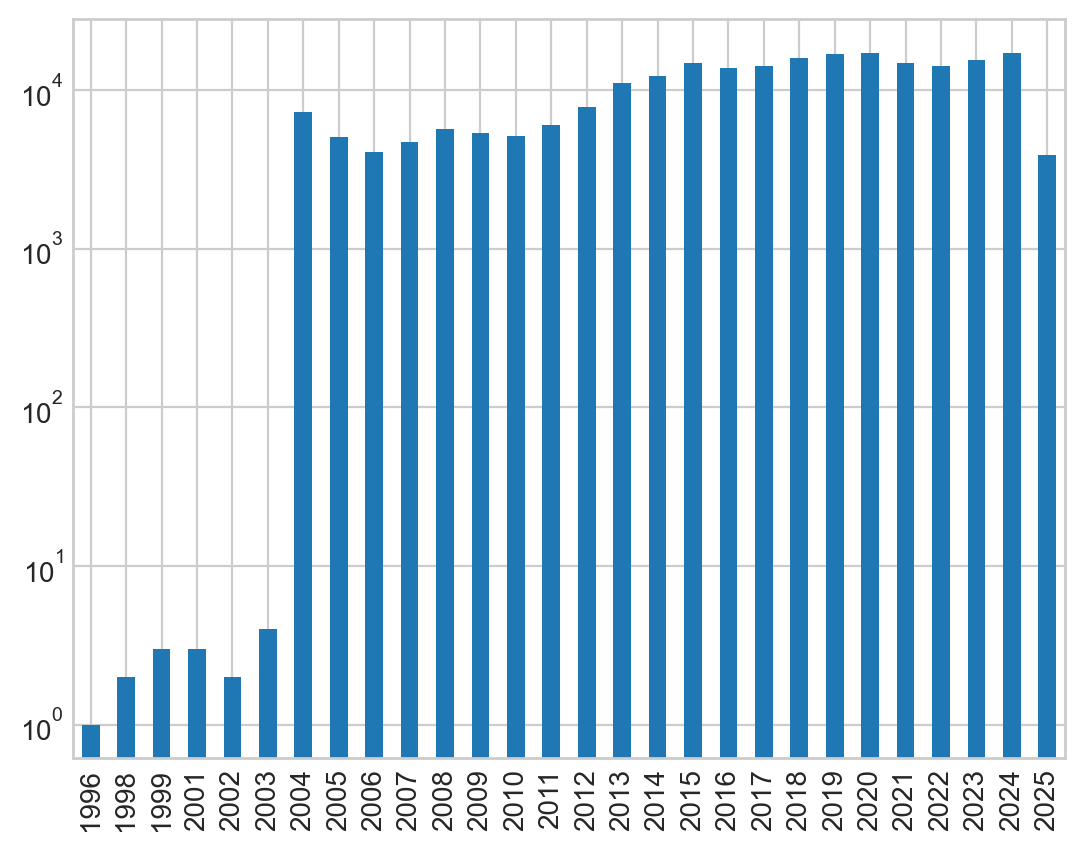

In [74]:
npedreportoverdates = (report_df.
                    query('safetyreportid in @ped_reports').
                    groupby('Year').
                    safetyreportid.
                    count()
                   )
fig,ax = plt.subplots(dpi=200)
npedreportoverdates.plot(kind='bar',ax=ax)
ax.set_yscale('log')
ax.set_xlabel('')

In [75]:
col = 'patient_custom_master_age'
display(patient_df[col].astype(float).dropna().shape[0])

2947791

In [76]:
values = patient_df.groupby('safetyreportid')[col].agg('mean').dropna().values

In [77]:
print(len(values))
print(len(values)/patient_df.shape[0])

2947791
1.0


In [78]:
gt_100 = values>100
sum(gt_100)

np.int64(337)

In [79]:
gt_115 = values>115
sum(gt_115)

np.int64(35)

In [80]:
lt_0 = values<0
sum(lt_0)

np.int64(0)

In [81]:
eq_0 = values==0
sum(eq_0)

np.int64(6816)

In [82]:
eq_100 = values==100
sum(eq_100)

np.int64(272)

In [83]:
lt_100 = values<100
gt_0 = values>0
num = sum(np.logical_and(gt_0,lt_100))
print(num)
num/len(values)

2940366


np.float64(0.9974811647094384)

In [84]:
lt_18 = values<18
num = sum(np.logical_and(gt_0,lt_18))
print(num)
num/len(values)

184992


np.float64(0.06275614519482554)

In [85]:
gtoeq_18 = values>=18
num = sum(np.logical_and(gtoeq_18,lt_100))
print(num)
num/len(values)

2755374


np.float64(0.9347250195146128)

In [86]:
sensical_values = values[np.logical_and(gt_0,lt_100)]

In [87]:
integer_year_counts = np.unique(np.floor(sensical_values),return_counts=True)
integer_year_counts

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
        78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
        91., 92., 93., 94., 95., 96., 97., 98., 99.]),
 array([21262,  8945,  7738,  7154,  6900,  7042,  7534,  7618,  7993,
         8195,  8645,  8680,  9542, 10370, 12259, 13857, 15116, 16142,
        15685, 15868, 16760, 17177, 17772, 18743, 18934, 19884, 20115,
        20921, 21327, 21795, 23971, 23043, 24221, 24209, 25123, 26045,
        25418, 26037, 26651, 26718, 29658, 28445, 30007, 31768, 32773,
        33880, 34752, 36987, 38662, 40794, 44866, 44510, 47070, 48791,
        

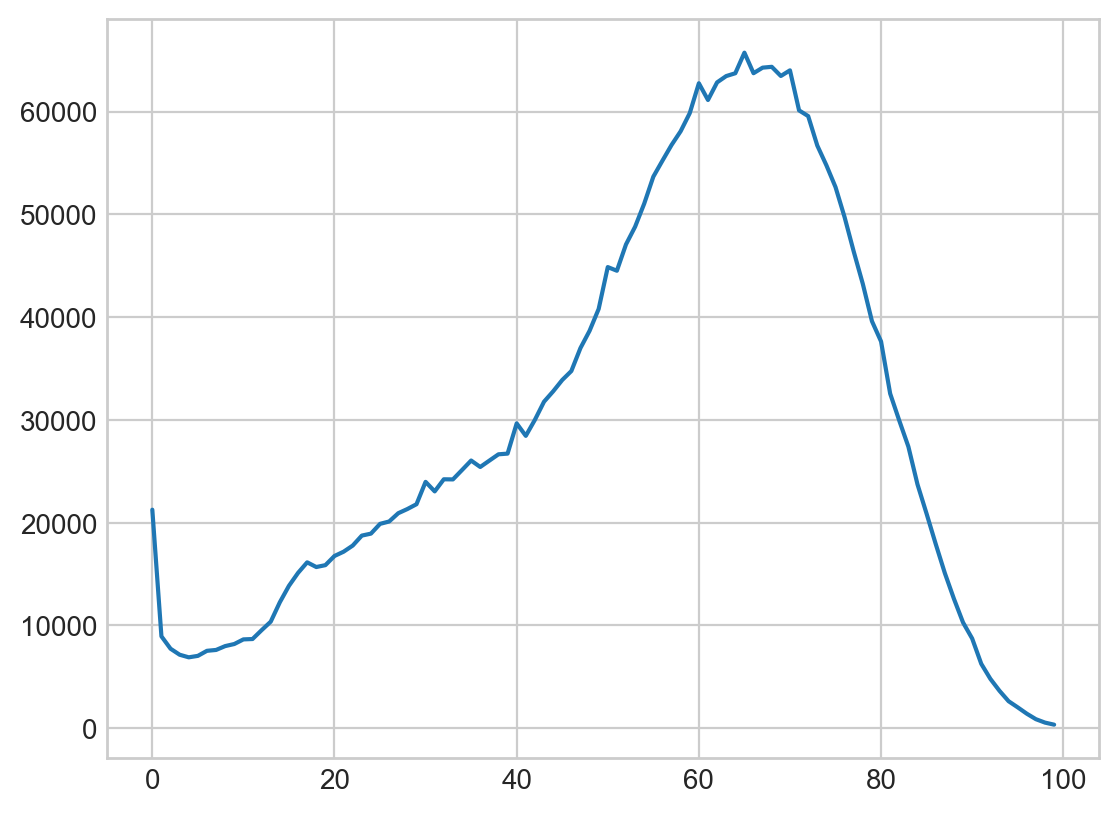

In [88]:
plt.figure(dpi=200)
plt.plot(integer_year_counts[0],integer_year_counts[1])

([<matplotlib.axis.XTick at 0x7fd6afd504a0>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20')])

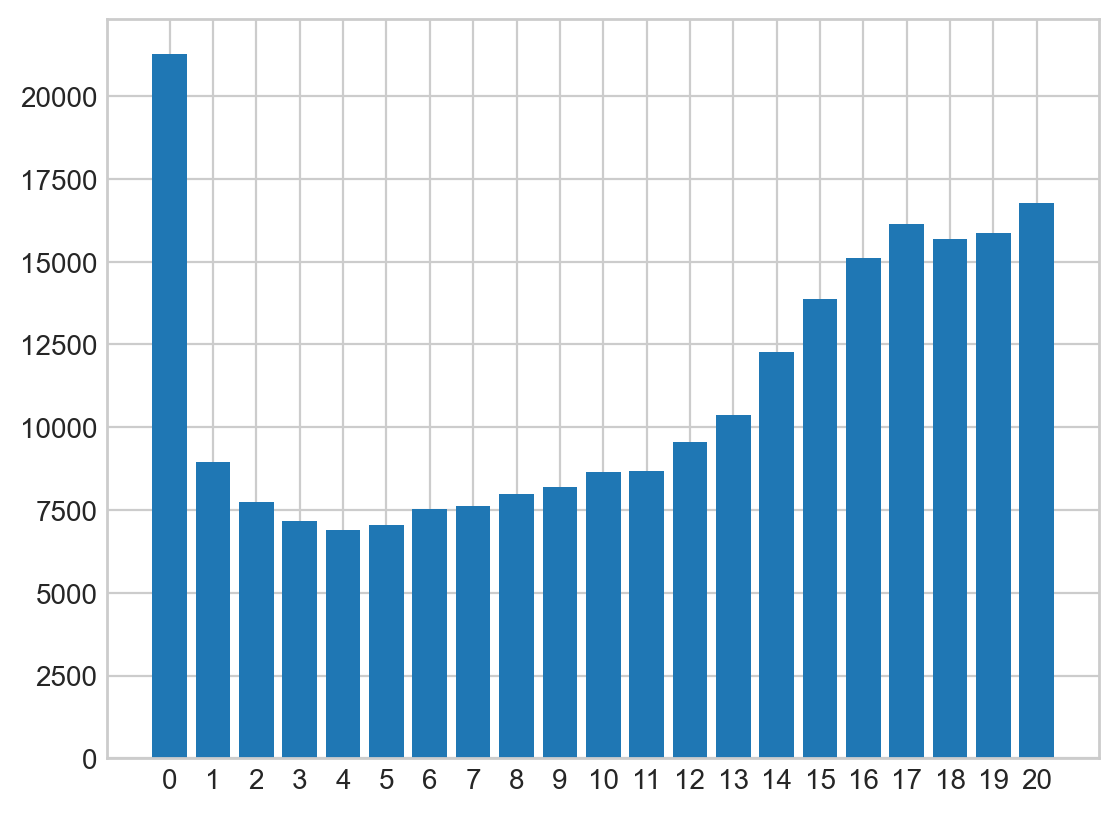

In [93]:
plt.figure(dpi=200)
plt.bar(integer_year_counts[0][:21],integer_year_counts[1][:21])
plt.xticks(integer_year_counts[0][:21])

/tmp/ipykernel_755/3481712632.py:6: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pivot = df.pivot_table(index='patient_custom_master_age',columns='patient_onsetageunit',


patient_custom_master_age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
patient_onsetageunit,,,,,,,,,,,,,,,,,,,,,
Decade,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
Year,0.00,0.44,0.8,0.96,0.98,0.98,0.99,0.99,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.99
Month,0.45,0.52,0.2,0.04,0.02,0.01,0.01,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
Week,0.08,0.02,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
Day,0.46,0.02,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
Hour,0.02,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


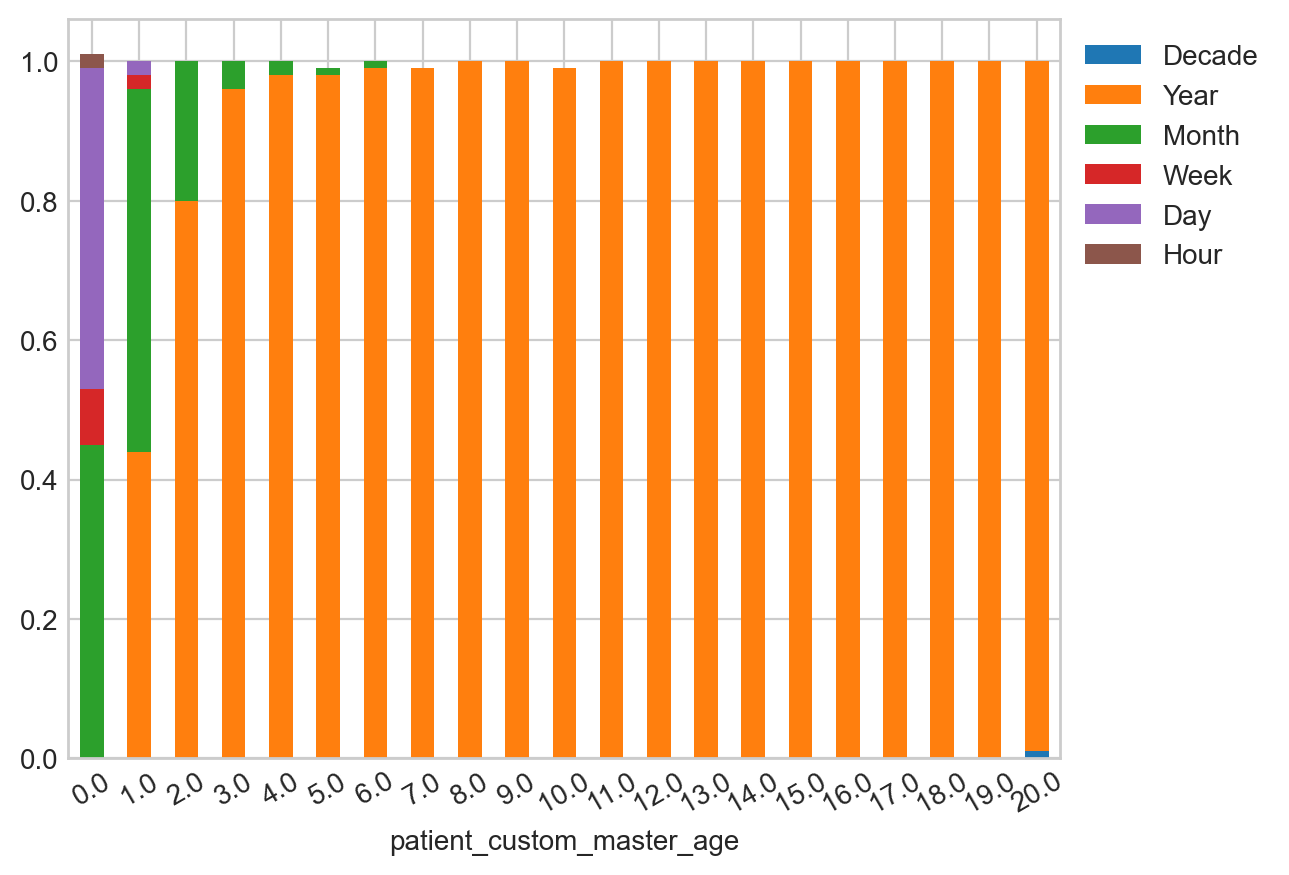

In [96]:
pediatric_patient_df = (patient_df.
                        query('patient_custom_master_age>0 & patient_custom_master_age<21'))
df = pediatric_patient_df[['patient_onsetageunit','patient_custom_master_age']].query('patient_custom_master_age<21').copy()
df['patient_custom_master_age'] = np.floor(df['patient_custom_master_age'])
df['mem'] = 1.
df_pivot = df.pivot_table(index='patient_custom_master_age',columns='patient_onsetageunit',
                          values='mem',aggfunc=sum,fill_value=0)
order=['Decade','Year','Month','Week','Day','Hour']
df_pivot = df_pivot[order].apply(lambda x : x / sum(x),axis=1).round(2)
display(df_pivot.T)
fig,ax=plt.subplots(dpi=200)
g = df_pivot.plot(kind='bar',stacked=True,ax=ax)
g.legend(bbox_to_anchor=(1,1))
g = g.set_xticklabels(g.get_xticklabels(),rotation=30)

##### Drug

In [ ]:
drug_df = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/drugs.csv.gz", compression='gzip', low_memory=False)
drug_characteristics_df = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/drugcharacteristics.csv.gz", compression='gzip', low_memory=False)

In [4]:
drug_df.head()

,rxcui,safetyreportid
0,197807,10003301
1,854183,10003301
2,731533,10003301
3,544393,10003301
4,206878,10003301


In [5]:
drug_characteristics_df.head()

,drug_administration,drug_characterization,drug_indication,medicinal_product,safetyreportid
0,Intravenous (not otherwise specified),Suspect (the drug was considered by the report...,OSTEOPOROSIS,BONIVA,10003300
1,NaN,Suspect (the drug was considered by the report...,PRODUCT USED FOR UNKNOWN INDICATION,IBUPROFEN,10003301
2,NaN,Suspect (the drug was considered by the report...,NaN,LYRICA,10003302
3,NaN,Suspect (the drug was considered by the report...,NaN,FIORINAL,10003304
4,NaN,Suspect (the drug was considered by the report...,NaN,DOXYCYCLINE HYCLATE,10003304


In [50]:
patient_drugcharacteristics = (patient_df.
                               set_index('safetyreportid').
                               join(drug_characteristics_df.
                               set_index('safetyreportid')
                                   )
                              )
patient_drugcharacteristics.head()

,patient_custom_master_age,patient_onsetage,patient_onsetageunit,patient_sex,patient_weight,drug_administration,drug_characterization,drug_indication,medicinal_product
safetyreportid,,,,,,,,,
10003300,77.0,77.0,Year,Female,NaN,Intravenous (not otherwise specified),Suspect (the drug was considered by the report...,OSTEOPOROSIS,BONIVA
10003301,NaN,NaN,NaN,Female,NaN,NaN,Suspect (the drug was considered by the report...,PRODUCT USED FOR UNKNOWN INDICATION,IBUPROFEN
10003302,NaN,NaN,NaN,Male,NaN,NaN,Suspect (the drug was considered by the report...,NaN,LYRICA
10003304,NaN,NaN,NaN,Female,NaN,NaN,Suspect (the drug was considered by the report...,NaN,FIORINAL
10003304,NaN,NaN,NaN,Female,NaN,NaN,Suspect (the drug was considered by the report...,NaN,DOXYCYCLINE HYCLATE


In [52]:
pediatric_patient_df = (patient_drugcharacteristics.
                        loc[:,['patient_custom_master_age','drug_indication']].
                        dropna().
                        query('patient_custom_master_age>0 & patient_custom_master_age<21').
                        reset_index()
                       )
pediatric_patient_df['year'] = np.floor(pediatric_patient_df.patient_custom_master_age).astype(int)

Text(0, 0.5, 'Age')

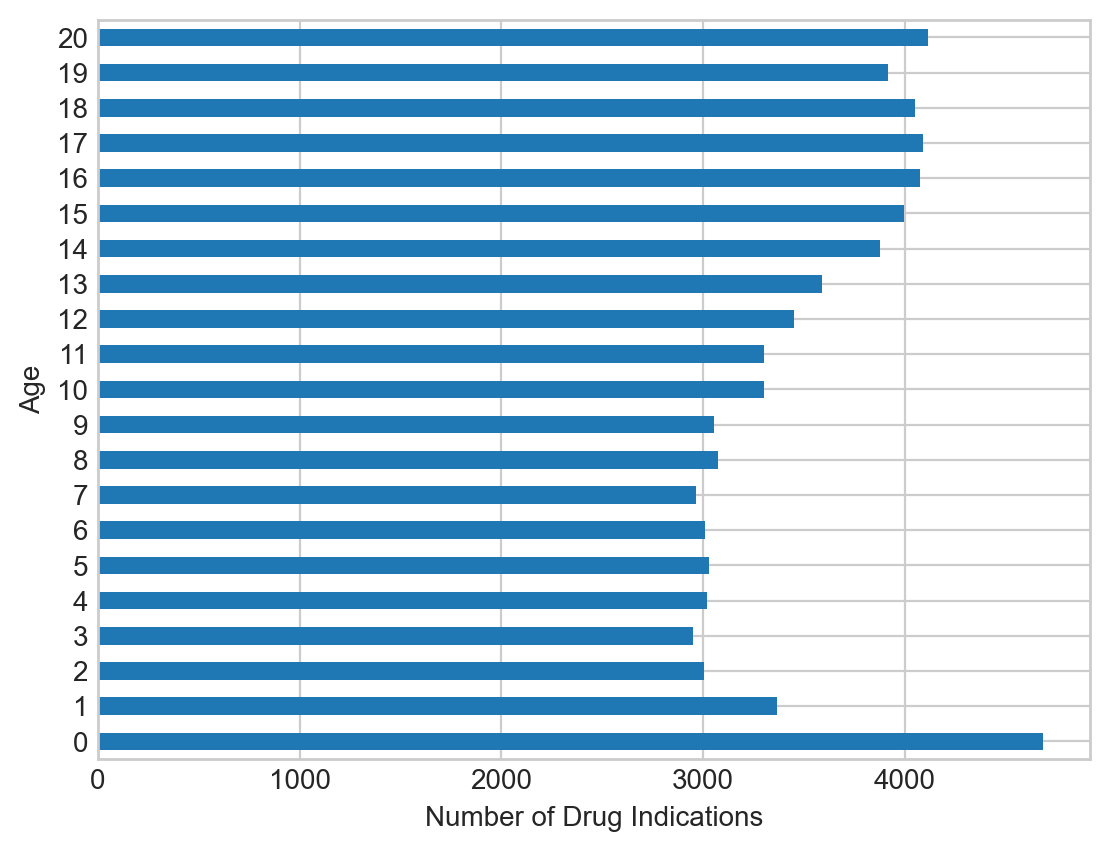

In [53]:
fig,ax = plt.subplots(dpi=200)
(pediatric_patient_df.
 loc[:,['year','drug_indication']].
 drop_duplicates().
 groupby('year')['drug_indication'].
 count()
).plot.barh(ax=ax)
ax.set_xlabel('Number of Drug Indications')
ax.set_ylabel('Age')

##### Reaction

In [108]:
reaction_df = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/reactions.csv.gz", compression='gzip', low_memory=False)

In [109]:
reaction_df

,reaction_meddrapt,reaction_outcome,safetyreportid
0,Diarrhoea,NaN,10003300
1,Arthralgia,NaN,10003300
2,Headache,NaN,10003300
3,Vomiting,NaN,10003300
4,Dyspepsia,NaN,10003301
...,...,...,...
56821719,Dizziness,Unknown,9999997
56821720,Cough,Unknown,9999997
56821721,Oedema,Unknown,9999998
56821722,Chest pain,Unknown,9999999


In [110]:
reaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56821724 entries, 0 to 56821723
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   reaction_meddrapt  object
 1   reaction_outcome   object
 2   safetyreportid     object
dtypes: object(3)
memory usage: 1.3+ GB


In [111]:
reaction_df.isna().sum().sort_values(ascending=False)

reaction_outcome     13030856
reaction_meddrapt          24
safetyreportid              0
dtype: int64

In [112]:
reaction_df['reaction_outcome'].value_counts()

reaction_outcome
Unknown                                                        24355566
Not recovered/not resolved                                      7289045
Recovered/resolved                                              6951188
Recovering/resolving                                            2861943
Fatal                                                           2153316
Recovered/resolved with sequelae (consequent health issues)      179810
Name: count, dtype: int64

#### Load Standard Data

##### Standard Drugs

In [ ]:
standard_drugs = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/standard_drugs.csv.gz", compression='gzip', low_memory=False)
standard_drugs_atc = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/standard_drugs_atc.csv.gz", compression='gzip', low_memory=False)
standard_drugs_rxnorm_ingredients = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/standard_drugs_rxnorm_ingredients.csv.gz", compression='gzip', low_memory=False)


##### Standard Reaction

In [ ]:
standard_reactions = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/standard_reactions.csv.gz", compression='gzip', low_memory=False)
standard_reactions_meddra_relationships = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/standard_reactions_meddra_relationships.csv.gz", compression='gzip', low_memory=False)

In [ ]:
standard_reactions_meddra_hlt = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/standard_reactions_meddra_hlt.csv.gz", compression='gzip', low_memory=False)
standard_reactions_meddra_hlgt = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/standard_reactions_meddra_hlgt.csv.gz", compression='gzip', low_memory=False)
standard_reactions_meddra_soc = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/standard_reactions_meddra_soc.csv.gz", compression='gzip', low_memory=False)
standard_reactions_snomed = pd.read_csv("../../data/openFDA_drug_event/er_tables_memory_efficient/standard_reactions_snomed.csv.gz", compression='gzip', low_memory=False)